## All purpose loan calculator
It calculates amortized loan schedule with principals and interests. It also lists breakdown of the payment schedule when additive payment is paid.

In [1]:
import pandas as pd

In [2]:
LOAN_AMT = 50000
LOAN_TERM = 60 #in month
APR = 0.1510 #in percentage

In [8]:
def calculate_interest(P,r):
    '''Calculate simple monthly interest payment
    '''
    
    return P*r/12
    
def calculate_snapshot_monthly(P, r, n):
    '''Calculate amortized monthly payment
    
    P (int): initial principal
    r (float): interest per period (e.g., APR/12)
    n (int): total number of payments
    '''
    r /= 12 #interest per month
    A = P / ( (1+r)**n-1 ) * (r*(1+r)**n)
    
    return A

def find_optimal_schedule(P,r,n,test_range,M=None):
    cols = ['Additive Down', 'Total Payment Schedule', 'Total Interest Paid']
    df = pd.DataFrame(columns=cols)
    
    for rng in test_range:
        total_schedule, total_interest = generate_amortization_table(P=P, r=r, n=n, M=M, additive=rng, return_range=True)
        df = pd.concat([df, pd.DataFrame([rng, total_schedule, total_interest], index=cols).T])
    
    df.reset_index(drop=True, inplace=True)
    return df

def generate_amortization_table(P,r,n,M=None,additive=0,return_range=False):
    '''Generate complete amortization schedule
    
    P (int): initial principal
    r (float): interest per period (e.g., APR/12)
    n (int): total number of payments
    additive (float): additional monthly principal payment
    '''
    cols = ['Beginning Balance', 'Total Pmt', 'Interest', 'Principal', 'Ending Balance', 'Total Interest']
    df = pd.DataFrame(columns=cols)
    if not M:
        M = calculate_snapshot_monthly(P=P, r=r, n=n)+additive #monthly total (this is constant)
    TI = 0
    
    for i in range(n):
        I = calculate_interest(P=P, r=r)
        TI += I
        P_i = P #initial balance
        pr = M-I #principal
        P -= pr #ending balance

        if P < 0: 
            M = P_i
            pr = M
            P = 0

        tmp = [P_i, M, I, pr, P, TI]
        tmp = [round(j,2) for j in tmp]
        
        df = pd.concat([df, pd.DataFrame(tmp, index=cols).T])

        if P == 0: #break cycle if ends early
            break

    df = df.reset_index(drop=True)
    df.index += 1
    if return_range:
        return max(df.index), TI
    else:
        return df

#### Strategically optimal point of overpayment is where dt_{t+1} == 2 which is at $250 point

In [4]:
df = find_optimal_schedule(P=LOAN_AMT, r=APR, n=LOAN_TERM, test_range=range(0, 3000, 50))

In [5]:
df

,Additive Down,Total Payment Schedule,Total Interest Paid
0,0.0,60.0,21527.360638
1,50.0,57.0,20158.176087
2,100.0,54.0,18957.367713
3,150.0,51.0,17896.702998
4,200.0,49.0,16950.997907
5,250.0,46.0,16105.057509
6,300.0,44.0,15342.21209
7,350.0,42.0,14649.595645
8,400.0,41.0,14020.501605
9,450.0,39.0,13444.890773


c:\ProgramData\Anaconda3\envs\main\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Additive Down'>

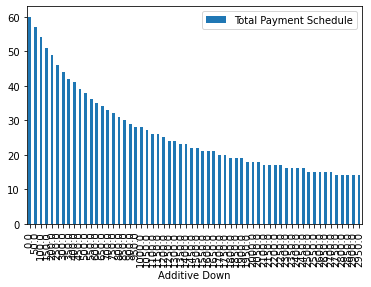

In [6]:
df.plot(x='Additive Down', y='Total Payment Schedule', kind='bar')

In [7]:
generate_amortization_table(P=LOAN_AMT, r=APR, n=LOAN_TERM, additive=250)#.Principal.sum()

,Beginning Balance,Total Pmt,Interest,Principal,Ending Balance,Total Interest
1,50000.0,1442.12,629.17,812.96,49187.04,629.17
2,49187.04,1442.12,618.94,823.19,48363.86,1248.1
3,48363.86,1442.12,608.58,833.54,47530.31,1856.68
4,47530.31,1442.12,598.09,844.03,46686.28,2454.77
5,46686.28,1442.12,587.47,854.65,45831.63,3042.24
6,45831.63,1442.12,576.71,865.41,44966.22,3618.96
7,44966.22,1442.12,565.82,876.3,44089.92,4184.78
8,44089.92,1442.12,554.8,887.32,43202.6,4739.58
9,43202.6,1442.12,543.63,898.49,42304.11,5283.21
10,42304.11,1442.12,532.33,909.8,41394.31,5815.54


#### Use manual total payment for simulation

In [19]:
generate_amortization_table(P=LOAN_AMT, r=APR, n=LOAN_TERM, M=1450, additive=0)#.Principal.sum()

,Beginning Balance,Total Pmt,Interest,Principal,Ending Balance,Total Interest
1,50000.0,1450.0,629.17,820.83,49179.17,629.17
2,49179.17,1450.0,618.84,831.16,48348.0,1248.0
3,48348.0,1450.0,608.38,841.62,47506.38,1856.38
4,47506.38,1450.0,597.79,852.21,46654.17,2454.17
5,46654.17,1450.0,587.07,862.93,45791.24,3041.24
6,45791.24,1450.0,576.21,873.79,44917.44,3617.44
7,44917.44,1450.0,565.21,884.79,44032.65,4182.65
8,44032.65,1450.0,554.08,895.92,43136.73,4736.73
9,43136.73,1450.0,542.8,907.2,42229.54,5279.54
10,42229.54,1450.0,531.39,918.61,41310.92,5810.92


#### END OF THE NOTEBOOK